# Part 3 - Predictive modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


Process to clean the data:
- used decribe to check for anamolies - the min for all numeric values look acceptable and max looks good as well.
- signup_date and last_trip_date need to be converted to datetime type
- convert 'trips_in_first_30_day' to int

In [7]:
df.isna().any()

city                      False
trips_in_first_30_days    False
signup_date               False
avg_rating_of_driver       True
avg_surge                 False
last_trip_date            False
phone                      True
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver       True
dtype: bool

Three columns have missing values: avg_rating_of_driver, phone and avg_rating_by_driver. I will fill NA values with the mean of of that column - will check the counts of the NA values prior to filling the values in. 

In [8]:
print('NA values for avg_rating_by_driver: ')
print(df.avg_rating_by_driver.isna().value_counts())
print('')
print('NA values for phone: ')
print(df.phone.isna().value_counts())
print('')
print('NA values for avg_rating_of_driver: ')
print(df.avg_rating_of_driver.isna().value_counts())

NA values for avg_rating_by_driver: 
False    49799
True       201
Name: avg_rating_by_driver, dtype: int64

NA values for phone: 
False    49604
True       396
Name: phone, dtype: int64

NA values for avg_rating_of_driver: 
False    41878
True      8122
Name: avg_rating_of_driver, dtype: int64


In [9]:
df = df[df['phone'].notna()]

In [10]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(round(df.avg_rating_of_driver.mean(), 1))

In [11]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(round(df.avg_rating_of_driver.mean(), 1))

In [12]:
df.isna().any()

city                      False
trips_in_first_30_days    False
signup_date               False
avg_rating_of_driver      False
avg_surge                 False
last_trip_date            False
phone                     False
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver      False
dtype: bool

In [13]:
#convert signup_date and last_trip_date to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [14]:
#convert number of trips to int
df.trips_in_first_30_days = df.trips_in_first_30_days.astype(int)

#convert ultimate_black_user to int
df.ultimate_black_user = df.ultimate_black_user.astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int32         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  int32         
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int32(2), ob

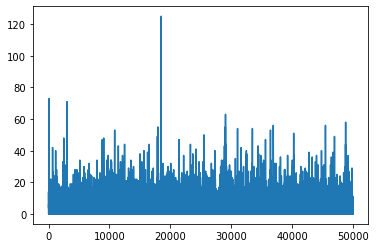

In [16]:
df['trips_in_first_30_days'].plot()

In [17]:
#check the date of signup date to ensure all users were signed up in Januar 2014
df['signup_date'].unique()

array(['2014-01-25T00:00:00.000000000', '2014-01-29T00:00:00.000000000',
       '2014-01-06T00:00:00.000000000', '2014-01-10T00:00:00.000000000',
       '2014-01-27T00:00:00.000000000', '2014-01-09T00:00:00.000000000',
       '2014-01-24T00:00:00.000000000', '2014-01-28T00:00:00.000000000',
       '2014-01-21T00:00:00.000000000', '2014-01-03T00:00:00.000000000',
       '2014-01-13T00:00:00.000000000', '2014-01-15T00:00:00.000000000',
       '2014-01-11T00:00:00.000000000', '2014-01-12T00:00:00.000000000',
       '2014-01-02T00:00:00.000000000', '2014-01-31T00:00:00.000000000',
       '2014-01-19T00:00:00.000000000', '2014-01-16T00:00:00.000000000',
       '2014-01-26T00:00:00.000000000', '2014-01-05T00:00:00.000000000',
       '2014-01-17T00:00:00.000000000', '2014-01-22T00:00:00.000000000',
       '2014-01-18T00:00:00.000000000', '2014-01-20T00:00:00.000000000',
       '2014-01-04T00:00:00.000000000', '2014-01-30T00:00:00.000000000',
       '2014-01-07T00:00:00.000000000', '2014-01-01

In [18]:
from datetime import timedelta

#create new column which will contain the sign up date + 30 days
#will use this new created column to check if the last trip taken is before or after the new date
df['signup_30'] = df['signup_date'] + timedelta(days=30)

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_30
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,2014-02-24
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,2014-02-28
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,2014-02-05
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,2014-02-09
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,2014-02-26


In [19]:
#create new column 'active_user' and set all value to 0
df['active_user'] = 0
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_30,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,2014-02-24,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,2014-02-28,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,2014-02-05,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,2014-02-09,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,2014-02-26,0


In [20]:
#change active user to 1 if the customer took a trip after 30 days of signing up 
df.loc[df['last_trip_date'] >= df['signup_30'], 'active_user'] = 1

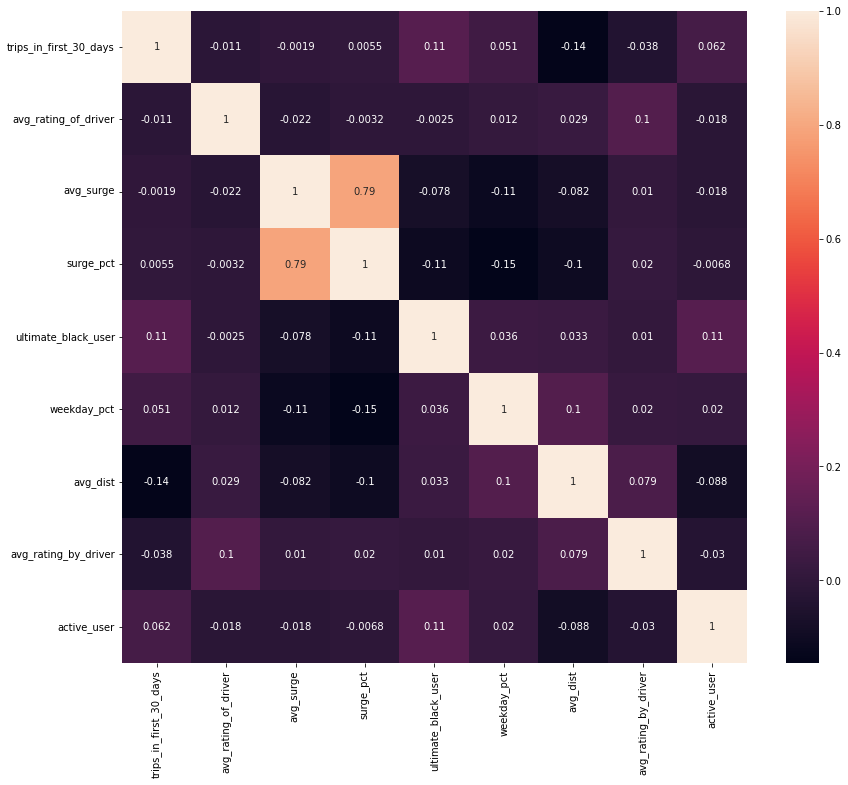

In [21]:
plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(), annot=True)

In [22]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set(style='darkgrid')

Text(0.5, 8.95999999999998, 'Retained Customer (0-no 1-yes)')

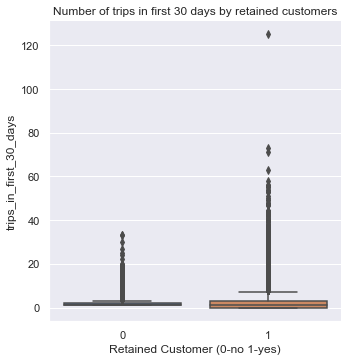

In [23]:

g = sns.catplot(x='active_user', y='trips_in_first_30_days', kind='box', data=df)
plt.title('Number of trips in first 30 days by retained customers')
plt.xlabel('Retained Customer (0-no 1-yes)')

Text(0.5, 22.960000000000015, 'Retained Customer (0-no 1-yes)')

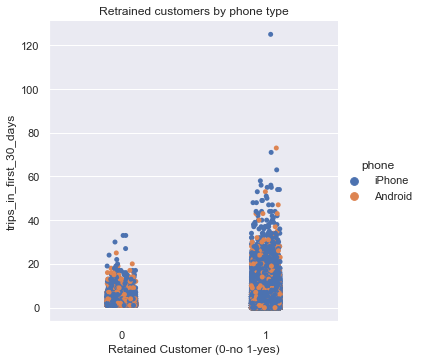

In [24]:
sns.catplot(x='active_user', y='trips_in_first_30_days', hue='phone', data=df)
plt.title('Retrained customers by phone type')
plt.xlabel('Retained Customer (0-no 1-yes)')

we can see that retained customers in general have more trips in the first 30 days that non-retrained customers.

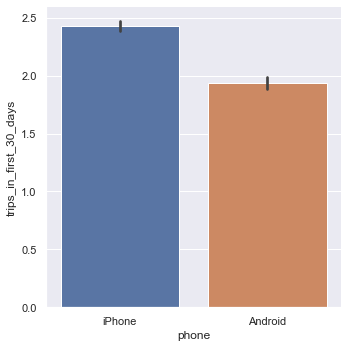

In [25]:

sns.catplot(x='phone', y='trips_in_first_30_days', kind='bar', data=df)

Based on the barplot above we can see that iphone users take more trips in the first 30 days.

Text(0.5, 0, 'Distribution of Phone Types')

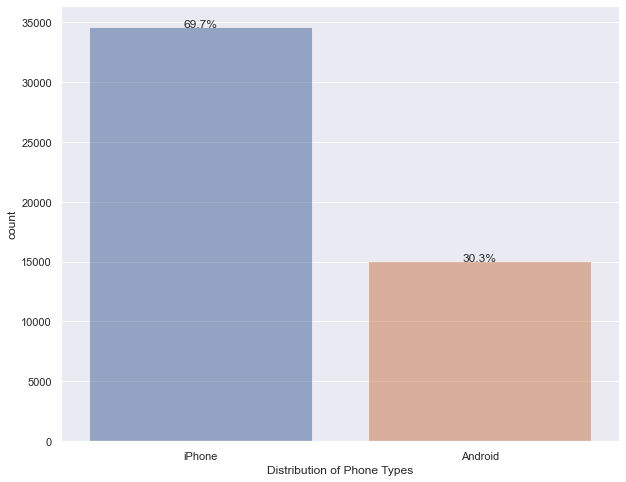

In [26]:
total = len(df)
g = sns.countplot(x='phone', data=df, alpha =0.6)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2, height+3, '{:.1f}%'.format((height/total)*100), ha='center')
plt.xlabel('Distribution of Phone Types')

Text(0.5, 0, '0-not retained 1 - retained')

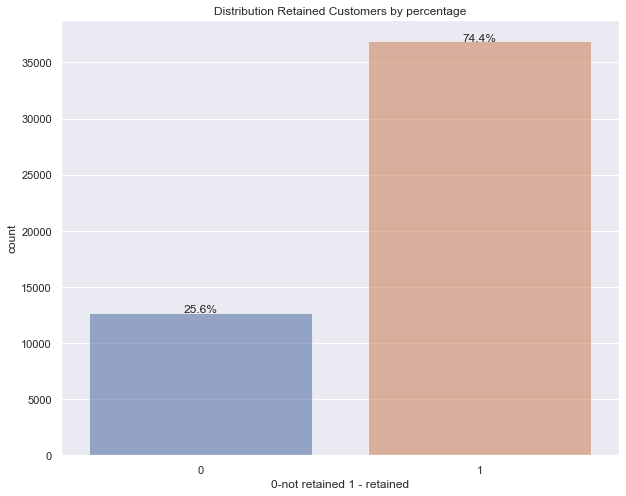

In [27]:
g = sns.countplot(x='active_user', data=df, alpha =0.6)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2, height+3, '{:.1f}%'.format((height/total)*100), ha='center')
plt.title('Distribution Retained Customers by percentage')
plt.xlabel('0-not retained 1 - retained')

## 74.4% of customer are retained customers while 25.6% are not.

Text(0.5, 0, '0-not retained 1 - retained')

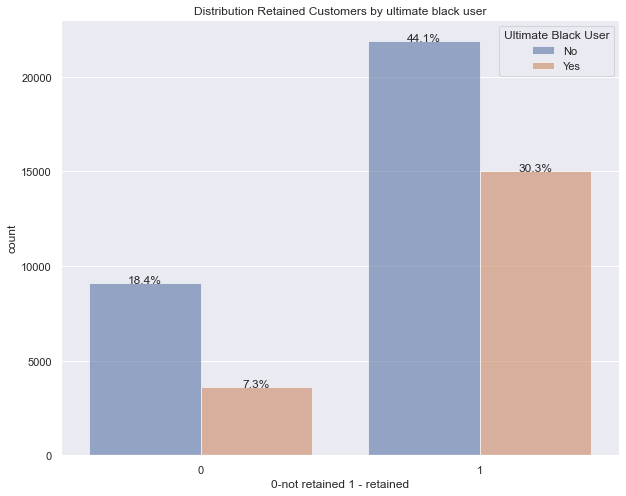

In [28]:
g = sns.countplot(x='active_user', data=df, hue='ultimate_black_user' ,alpha=0.6)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2, height+3, '{:.1f}%'.format((height/total)*100), ha='center')

plt.legend(title='Ultimate Black User', loc='upper right', labels=['No', 'Yes'])
plt.title('Distribution Retained Customers by ultimate black user')
plt.xlabel('0-not retained 1 - retained')

Based on the plot above the ultimate balck car user doesn't have a great affect on wether the customer takes a trip after 30 days of the date of signing up.

## Modeling

### Encode categorial variables

In [29]:
df2 = pd.get_dummies(df)

In [30]:
df2.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_30,active_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,2014-02-24,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,2014-02-28,1,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,2014-02-05,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,2014-02-09,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,2014-02-26,1,0,0,1,1,0


### Split the data

In [31]:
y = df2['active_user']
X = df2.drop(columns=['active_user', 'signup_30'])

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (34722, 15)
Number transactions y_train dataset:  (34722,)
Number transactions X_test dataset:  (14882, 15)
Number transactions y_test dataset:  (14882,)


In [33]:
X_train['signup_date']=X_train['signup_date'].apply(lambda x: x.toordinal())
X_train['last_trip_date']=X_train['last_trip_date'].apply(lambda x: x.toordinal())
X_test['signup_date']=X_test['signup_date'].apply(lambda x: x.toordinal())
X_test['last_trip_date']=X_test['last_trip_date'].apply(lambda x: x.toordinal())

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score

classifier = LogisticRegression(random_state=123)
classifier.fit(X_train, y_train)

#predict Test results
y_pred = classifier.predict(X_test)

#evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]], 
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.sort_values(["Precision", "Recall"], ascending = False)

print (results)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression       1.0        1.0     1.0       1.0


In [35]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [36]:
# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
1         SVM (Linear)       1.0        1.0     1.0       1.0       1.0
0  Logistic Regression       1.0        1.0     1.0       1.0       NaN


In [37]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred  = classifier.predict(X_test)


#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0          SVM (Linear)  1.000000   1.000000  1.000000  1.000000  1.000000
1   Logistic Regression  1.000000   1.000000  1.000000  1.000000       NaN
2  K-Nearest Neighbours  0.995095   0.998644  0.994778  0.996707  0.995549


In [38]:
# Fitting Kernel SVM to the Training set:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0          SVM (Linear)  1.000000   1.000000  1.000000  1.000000  1.000000
1   Logistic Regression  1.000000   1.000000  1.000000  1.000000       NaN
2  K-Nearest Neighbours  0.995095   0.998644  0.994778  0.996707  0.995549
3            Kernel SVM  0.746338   0.746338  1.000000  0.854746  0.936351


In [39]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0          SVM (Linear)  1.000000   1.000000  1.000000  1.000000  1.000000
1   Logistic Regression  1.000000   1.000000  1.000000  1.000000       NaN
4         Random Forest  0.996371   0.999187  0.995949  0.997565  0.996595
2  K-Nearest Neighbours  0.995095   0.998644  0.994778  0.996707  0.995549
3            Kernel SVM  0.746338   0.746338  1.000000  0.854746  0.936351


SVM and Logistic Regression seem to be performing the best - however I am not sure if the results are actually accurate, I checked both models a few times and couldn't find an issue.  
When I ran other models (Kernel SVM) I saw the drop in results which made me think maybe the other models are accurate. 

In [40]:
del df
del df2
del X_train
del X_test
del y_train
del y_test